In [4]:
import numpy as np
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)
print("The dataset has the lenght of: ", len(x))

The dataset has the lenght of:  100


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

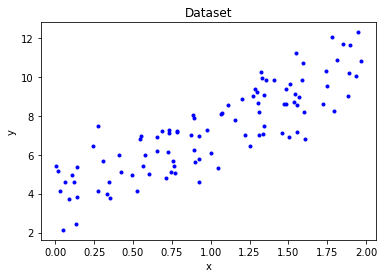

In [6]:
plt.plot(x, y, 'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dataset')
plt.show()

In [7]:
import pandas as pd

In [8]:
data = {"Amount_damaged_equipment": x.flatten(), "Cost": y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,Amount_damaged_equipment,Cost
0,1.964863,10.817617
1,1.570773,8.975605
2,1.608042,6.803835
3,0.785445,7.233940
4,1.253346,6.426330
5,1.406589,9.835342
6,1.001684,6.099352
7,0.088172,3.719378
8,0.897343,5.638587
9,0.894697,7.895176


In [9]:
#Scalling up the data of affected equipment 
df["Amount_damaged_equipment"] = df["Amount_damaged_equipment"] * 1000
df["Amount_damaged_equipment"] = df["Amount_damaged_equipment"].astype(int)
#Scalling up the data of cost
df["Cost"] = df["Cost"] * 10000
df["Cost"] = df["Cost"].astype(int)
df.head(10)


,Amount_damaged_equipment,Cost
0,1964,108176
1,1570,89756
2,1608,68038
3,785,72339
4,1253,64263
5,1406,98353
6,1001,60993
7,88,37193
8,897,56385
9,894,78951


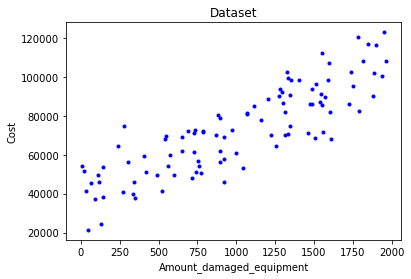

In [10]:
plt.plot(df["Amount_damaged_equipment"], df["Cost"], 'b.')
plt.xlabel('Amount_damaged_equipment')
plt.ylabel('Cost')
plt.title('Dataset')
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
#Fitting the data to the model
#Model gets the input and output parameters
#Model predicts the output based on the input
lin_reg.fit(df['Amount_damaged_equipment'].values.reshape(-1, 1), df['Cost'].values)

LinearRegression()

In [12]:
#parameter of theta 0 and theta 1 respectivly
print("Theta 0: ", lin_reg.intercept_)
print("Theta 1: ", lin_reg.coef_)

Theta 0:  38628.88672710563
Theta 1:  [33.86723969]


In [13]:
#prediction for the minimum and max value of the dataset of the amount of data during the training
print("The minimum value of the dataset: ", df['Amount_damaged_equipment'].min())
print("The maximum value of the dataset: ", df['Amount_damaged_equipment'].max())
#fit those values into an array
x_minimun_maximun = np.array([df['Amount_damaged_equipment'].min(), df['Amount_damaged_equipment'].max()])
print(x_minimun_maximun)
y_train_pred = lin_reg.predict(x_minimun_maximun.reshape(-1, 1))

The minimum value of the dataset:  5
The maximum value of the dataset:  1964
[   5 1964]


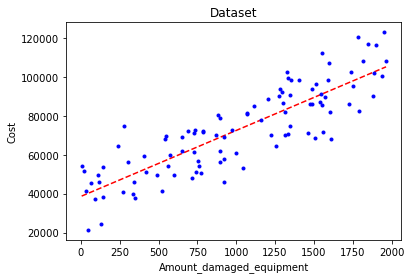

In [14]:
plt.plot(x_minimun_maximun, y_train_pred, 'r--')
plt.plot(df['Amount_damaged_equipment'], df['Cost'], 'b.')
plt.xlabel('Amount_damaged_equipment')
plt.ylabel('Cost')
plt.title('Dataset')
plt.show()
#prediction for the minimum and max value of the dataset of the amount of data during the training
#red line is the prediction of the model
#blue dots are the actual data

In [15]:
x_new = np.array([[1200]])
#prediction of the cost of the equipment
damage_cost = lin_reg.predict(x_new)
#print("The cost of the equipment is: ", damage_cost, "$")
#print("The cost of the equipment is: ", int(damage_cost)[0], "$")
print("The cost of the equipment is: ", int(damage_cost), "$")


The cost of the equipment is:  79269 $


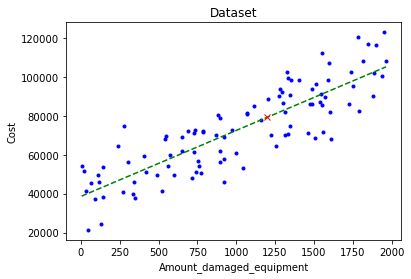

In [22]:
plt.plot(df["Amount_damaged_equipment"], df["Cost"], 'b.')
plt.plot(x_minimun_maximun, y_train_pred, 'g--')
plt.plot(x_new, damage_cost, 'rx')
plt.xlabel('Amount_damaged_equipment')
plt.ylabel('Cost')
plt.title('Dataset')
plt.show()